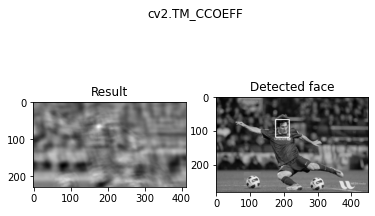

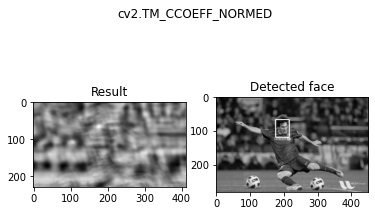

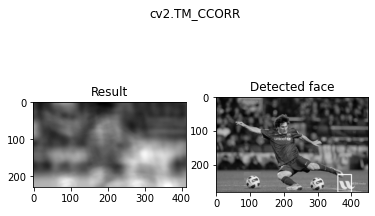

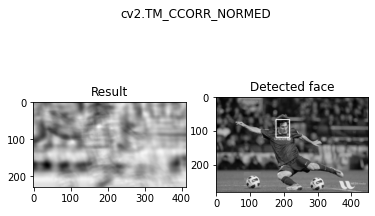

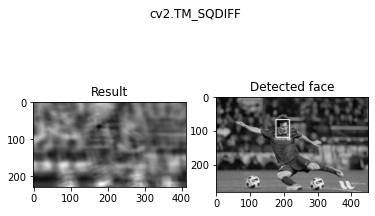

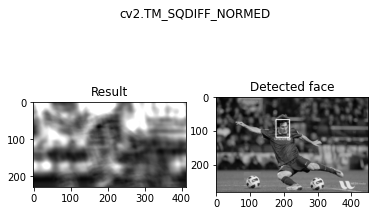

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/sansk/OneDrive/Desktop/college assignments/messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('C:/Users/sansk/OneDrive/Desktop/college assignments/messi_face.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    resolution = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(resolution)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        Lefttop = min_loc
    else:
        Lefttop = max_loc
        Rightbottom = (Lefttop[0] + w, Lefttop[1] + h)

    cv2.rectangle(img,Lefttop, Rightbottom, 260, 2)

    plt.subplot(121)
    plt.imshow(resolution,cmap = 'gray')
    plt.title('Result')
   
    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected face')
  
    plt.suptitle(meth)
    plt.show()